In [4]:
# Remember to update your path
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("C:/Users/Gang/Documents/Qishi_QR")

from Backtesting.Vectorized.cross_compare import *
from Backtesting.Vectorized.models import *

from Utils.lm import gen_strategy, LM_model
#from Utils.MajorContract_Offsets import MajorContracts
from Utils.MajorContract_split import MajorContracts


import warnings
warnings.filterwarnings(action='ignore')


from config import AgConfig, RuConfig, RbConfig

def Generate_Direction(mj, threshold = np.linspace(1,15,num=(15.-1)/2+1)):
    result = pd.DataFrame(index=mj.index)
    for thx in threshold:
        result[round(thx,1)] = mj['LastPrice'].diff().apply(lambda x: 2 if x > thx 
                                            else (1 if x < -thx else 0))
    return result
 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


----

# 1. Price-change 

In [ ]:

# ====== Initial Configuration - Ru 5min ========
params = RuConfig(frequency=5)

mj5 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset)

mj_train_5, mj_test_5, ptb_5 = mj5.create_major_overlap()

PT_5 = Generate_Direction(mj_train_5)
Frequency_Count = PT_5.apply(pd.value_counts).T

Value_Prob_5 = PT_5.apply(pd.value_counts).T
Value_Prob_5 = Value_Prob_5.div(Value_Prob_5.sum(axis=1), axis=0)

In [ ]:
# ====== Initial Configuration - Ru 10min ========
params = RuConfig(frequency=10)

mj10 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset)

mj_train_10, mj_test_10, ptb_10 = mj10.create_major_overlap()

PT_10 = Generate_Direction(mj_train_10)
Frequency_Count = PT_10.apply(pd.value_counts).T

Value_Prob_10 = PT_10.apply(pd.value_counts).T
Value_Prob_10 = Value_Prob_10.div(Value_Prob_10.sum(axis=1), axis=0)

In [ ]:
# ====== Initial Configuration - Ru 15min ========
params = RuConfig(frequency=15)

mj15 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset)

mj_train_15, mj_test_15, ptb_15 = mj15.create_major_overlap()

PT_15 = Generate_Direction(mj_train_15)
Frequency_Count = PT_5.apply(pd.value_counts).T

Value_Prob_15 = PT_15.apply(pd.value_counts).T
Value_Prob_15 = Value_Prob_15.div(Value_Prob_15.sum(axis=1), axis=0)

## 1.1 Compare the probability of price change

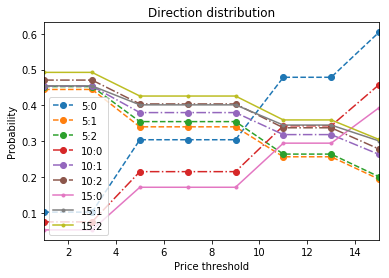

In [8]:
fig = plt.figure()
ax = plt.gca()
Value_Prob_5.plot(ax = ax, marker='o', style='--')
legend_5 = ['5:{}'.format(x) for x in [0,1,2]]
Value_Prob_10.plot(ax = ax, marker='o', style='-.')
legend_10 = ['10:{}'.format(x) for x in [0,1,2]]
Value_Prob_15.plot(ax = ax, marker='.')
legend_15 = ['15:{}'.format(x) for x in [0,1,2]]

plt.legend(legend_5+legend_10+legend_15)
ax.set_title('Direction distribution')
ax.set_ylabel('Probability')
ax.set_xlabel('Price threshold')

-----

# 2. Check the probability table

In [10]:
ptb_5_df = pd.concat(ptb_5)
ptb_5_df.index = ptb_5_df.index.droplevel(level=0)
ptb_5_df['len'] = ptb_5_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_5_df[ptb_5_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [ 0.66666667  0.33333333]

Prior length:3 	0,1,2: [ 0.5  0.5]

Prior length:4 	0,1,2: [ 0.51851852  0.48148148]

Prior length:5 	0,1,2: [ 0.48765432  0.47530864  0.03703704]

Prior length:6 	0,1,2: [ 0.4526749   0.40946502  0.13786008]

Prior length:7 	0,1,2: [ 0.37860082  0.33744856  0.28395062]

Prior length:8 	0,1,2: [ 0.56012803  0.2432556   0.19661637]


In [11]:
ptb_10_df = pd.concat(ptb_10)
ptb_10_df.index = ptb_10_df.index.droplevel(level=0)
ptb_10_df['len'] = ptb_10_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_10_df[ptb_10_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [ 0.66666667  0.33333333]

Prior length:3 	0,1,2: [ 0.5  0.5]

Prior length:4 	0,1,2: [ 0.55555556  0.38888889  0.05555556]

Prior length:5 	0,1,2: [ 0.44444444  0.41975309  0.13580247]

Prior length:6 	0,1,2: [ 0.35802469  0.33539095  0.30658436]

Prior length:7 	0,1,2: [ 0.5260631   0.25514403  0.21879287]

Prior length:8 	0,1,2: [ 0.71444902  0.15706447  0.12848651]


In [12]:
ptb_15_df = pd.concat(ptb_15)
ptb_15_df.index = ptb_15_df.index.droplevel(level=0)
ptb_15_df['len'] = ptb_15_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_15_df[ptb_15_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [ 0.66666667  0.33333333]

Prior length:3 	0,1,2: [ 0.66666667  0.33333333]

Prior length:4 	0,1,2: [ 0.61111111  0.35185185  0.03703704]

Prior length:5 	0,1,2: [ 0.40740741  0.38271605  0.20987654]

Prior length:6 	0,1,2: [ 0.42386831  0.29423868  0.281893  ]

Prior length:7 	0,1,2: [ 0.6351166   0.19067215  0.17421125]

Prior length:8 	0,1,2: [ 0.79515318  0.108139    0.09670782]


# 3. Check the generated signal

In [13]:
params = RuConfig(frequency=5)

slm_5 = ptb_5_df.groupby(['prior']).sum().reset_index()
slm_5['signal'] = slm_5.loc[:, '0':'2'].idxmax(axis=1)

signal_5 = MajorSeriesTest(mj_test_5, params.output_path, slm_5)
signal_5.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_5.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 5min
Prior length:2 	0,1,2: [ 0.51871523  0.48128477]
Prior length:3 	0,1,2: [ 0.51087506  0.48912494]
Prior length:4 	0,1,2: [  5.25543753e-01   4.74203338e-01   2.52908447e-04]
Prior length:5 	0,1,2: [ 0.50581689  0.4881133   0.0060698 ]
Prior length:6 	0,1,2: [ 0.52807284  0.44258978  0.02933738]
Prior length:7 	0,1,2: [ 0.48558422  0.42867982  0.08573596]


In [14]:
params = RuConfig(frequency=10)

slm_10 = ptb_10_df.groupby(['prior']).sum().reset_index()
slm_10['signal'] = slm_10.loc[:, '0':'2'].idxmax(axis=1)

signal_10 = MajorSeriesTest(mj_test_10, params.output_path, slm_10)
signal_10.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_10.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 10min
Prior length:2 	0,1,2: [ 0.52991027  0.47008973]
Prior length:3 	0,1,2: [  5.35393819e-01   4.64107677e-01   4.98504487e-04]
Prior length:4 	0,1,2: [ 0.49850449  0.49800598  0.00348953]
Prior length:5 	0,1,2: [ 0.53040877  0.46261216  0.00697906]
Prior length:6 	0,1,2: [ 0.50099701  0.46809571  0.03090728]
Prior length:7 	0,1,2: [ 0.5329013   0.3773679   0.08973081]


In [15]:
params = RuConfig(frequency=15)

slm_15 = ptb_15_df.groupby(['prior']).sum().reset_index()
slm_15['signal'] = slm_15.loc[:, '0':'2'].idxmax(axis=1)

signal_15 = MajorSeriesTest(mj_test_15, params.output_path, slm_15)
signal_15.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_15.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 15min
Prior length:2 	0,1,2: [ 0.72610015  0.27389985]
Prior length:3 	0,1,2: [ 0.50379363  0.49620637]
Prior length:4 	0,1,2: [ 0.54021244  0.45902883  0.00075873]
Prior length:5 	0,1,2: [ 0.51138088  0.47723824  0.01138088]
Prior length:6 	0,1,2: [ 0.48937785  0.46509863  0.04552352]
Prior length:7 	0,1,2: [ 0.45675266  0.43930197  0.10394537]


----
# Backtest

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.247601,0.007214,-0.002634,0.001436,0.000193,-0.027583,0.014711,-0.054625,0.545147,7.283898,2165,1.418412,0.658199
1,0.249595,0.007313,-0.002768,0.001414,0.000210,-0.027583,0.013872,-0.051168,0.511023,7.324880,2020,1.424154,0.707426
2,0.233153,0.005798,-0.002792,0.001429,0.000173,-0.027583,0.010691,-0.054734,0.511784,6.216894,1942,1.336281,0.696704
3,0.251766,0.003841,-0.002965,0.001475,0.000127,-0.022042,0.010691,-0.064571,0.497565,3.813829,1749,1.222765,0.672384
4,0.277849,0.004406,-0.002782,0.001530,0.000140,-0.030264,0.011919,-0.080178,0.550100,3.964571,1831,1.255560,0.647187
5,0.294959,0.001833,-0.002692,0.001762,0.000063,-0.024829,0.019361,-0.086798,0.654449,1.553449,1691,1.106303,0.589592
6,0.241870,0.003793,-0.002362,0.001910,0.000124,-0.024269,0.027050,-0.069888,0.808641,3.920161,1771,1.219975,0.557312


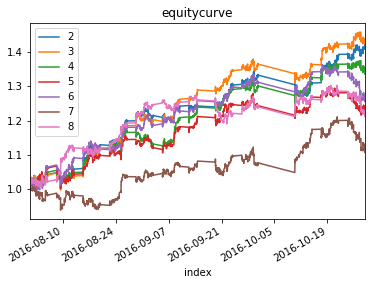

In [16]:
from config import RuConfig
params=RuConfig(frequency=5)

Ru_5_test = MajorSeriesTest(mj_test_5, params.output_path, slm_5 )
Ru_5_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Ru_5_test.run()
Ru_5_test.plot()
Ru_5_test.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.235925,0.004657,-0.003747,0.001995,0.000239,-0.028270,0.014711,-0.044923,0.532393,4.934687,1129,1.270099,0.672276
1,0.235925,0.004657,-0.003747,0.001995,0.000239,-0.028270,0.014711,-0.044923,0.532393,4.934687,1129,1.270099,0.672276
2,0.208796,0.004308,-0.003742,0.001973,0.000225,-0.028270,0.014711,-0.045239,0.527139,5.158537,1113,1.249883,0.671159
3,0.267163,0.005092,-0.003662,0.002099,0.000256,-0.022042,0.016889,-0.052466,0.573226,4.764590,1155,1.295318,0.651948
4,0.222892,0.001059,-0.003741,0.002106,0.000060,-0.025966,0.023926,-0.080661,0.562951,1.187568,1024,1.061410,0.626953
5,0.240132,0.000250,-0.003494,0.002411,0.000015,-0.025610,0.017184,-0.126166,0.689867,0.260228,940,1.014497,0.572340
6,0.288085,0.002396,-0.003332,0.002688,0.000158,-0.023785,0.024305,-0.089420,0.806645,2.079664,880,1.138996,0.565909


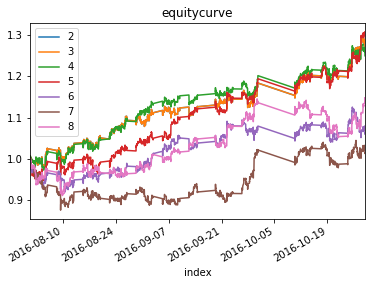

In [17]:
params=RuConfig(frequency=10)

Ru_10_test = MajorSeriesTest(mj_test_10, params.output_path, slm_10 )
Ru_10_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Ru_10_test.run()
Ru_10_test.plot()
Ru_10_test.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.312314,0.003152,-0.004840,0.002613,0.000257,-0.025965,0.031666,-0.097030,0.539768,2.523134,710,1.182818,0.664789
1,0.238855,0.001755,-0.005302,0.003590,0.000258,-0.027157,0.048411,-0.075002,0.677042,1.836868,394,1.101789,0.619289
2,0.299423,0.004172,-0.003333,0.002984,0.000303,-0.021366,0.031666,-0.070388,0.895395,3.483731,800,1.242001,0.566250
3,0.313878,0.003775,-0.003280,0.002989,0.000255,-0.016923,0.031666,-0.100692,0.911230,3.006528,860,1.218935,0.553488
4,0.309235,0.003413,-0.003706,0.003170,0.000284,-0.042073,0.027050,-0.088602,0.855272,2.759058,698,1.197942,0.560172
5,0.259490,0.003932,-0.003767,0.003447,0.000369,-0.021335,0.031666,-0.059151,0.915115,3.788239,618,1.228058,0.561489
6,0.280753,0.003623,-0.003943,0.004165,0.000406,-0.026845,0.037591,-0.090737,1.056229,3.226425,517,1.210153,0.526112


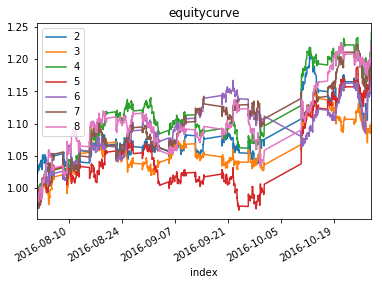

In [18]:
params=RuConfig(frequency=15)

Ru_15_test = MajorSeriesTest(mj_test_15, params.output_path, slm_15 )
Ru_15_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Ru_15_test.run()
Ru_15_test.plot()
Ru_15_test.performance